In [144]:
# step 2Import essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


In [146]:
#step 3 Load the dataset
file_path = "Dentistry Dataset.csv"
df = pd.read_csv(file_path)

# Display basic info
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Sample ID                        0 non-null      float64
 2   Age                              1100 non-null   int64  
 3   Gender                           1100 non-null   object 
 4   inter canine distance intraoral  1100 non-null   float64
 5   intercanine distance casts       1100 non-null   float64
 6   right canine width intraoral     1100 non-null   float64
 7   right canine width casts         1100 non-null   float64
 8   left canine width intraoral      1100 non-null   float64
 9   left canine width casts          1100 non-null   float64
 10  right canine index intra oral    1100 non-null   float64
 11  right canine index casts         1100 non-null   float64
 12  left canine index in

(None,
    Sl No  Sample ID  Age  Gender  inter canine distance intraoral  \
 0      1        NaN   24  Female                            25.06   
 1      2        NaN   22  Female                            25.78   
 2      3        NaN   23  Female                            23.83   
 3      4        NaN   20  Female                            26.12   
 4      5        NaN   20  Female                            26.36   
 
    intercanine distance casts  right canine width intraoral  \
 0                       25.05                          6.08   
 1                       25.79                          6.13   
 2                       23.83                          5.91   
 3                       26.12                          6.08   
 4                       26.41                          6.09   
 
    right canine width casts  left canine width intraoral  \
 0                      6.08                         6.09   
 1                      6.13                         6.33   
 2

In [148]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Dentistry Dataset.csv")  # Update file path if needed

# Drop the "Sample ID" column
df.drop(columns=["Sample ID"], inplace=True, errors="ignore")

# Save the cleaned dataset
df.to_csv("Dentistry_Dataset_Cleaned.csv", index=False)

# Display confirmation message
print("Successfully removed 'Sample ID' and saved the cleaned dataset.")


Successfully removed 'Sample ID' and saved the cleaned dataset.


In [150]:
#step4: Data preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, Normalizer

# Load the dataset


# Display basic information about the dataset
print("Initial Dataset Info:\n")
print(df.info())
print("\nMissing Values Count:\n", df.isnull().sum())

# Handling Missing Values
# Dropping 'Sample ID' as it contains only NaN values
df = df.drop(columns=['Sample ID'], errors='ignore')




# Encoding Categorical Data
label_encoder = LabelEncoder()
if 'Gender' in df.columns:
    df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male:1, Female:0

# Splitting Independent (X) and Dependent (Y) Variables
X = df.drop(columns=['Sl No', 'Gender'], errors='ignore')  # Excluding Serial No and Target Variable
y = df['Gender']  # Target Variable

# Normalizing X
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X)
X = pd.DataFrame(X_normalized, columns=X.columns)

# Display Processed Data
print("\nProcessed Data Head:\n", X.head())
print("\nTarget Variable Head:\n", y.head())


Initial Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Age                              1100 non-null   int64  
 2   Gender                           1100 non-null   object 
 3   inter canine distance intraoral  1100 non-null   float64
 4   intercanine distance casts       1100 non-null   float64
 5   right canine width intraoral     1100 non-null   float64
 6   right canine width casts         1100 non-null   float64
 7   left canine width intraoral      1100 non-null   float64
 8   left canine width casts          1100 non-null   float64
 9   right canine index intra oral    1100 non-null   float64
 10  right canine index casts         1100 non-null   float64
 11  left canine index intraoral      1100 non-null   float64
 1

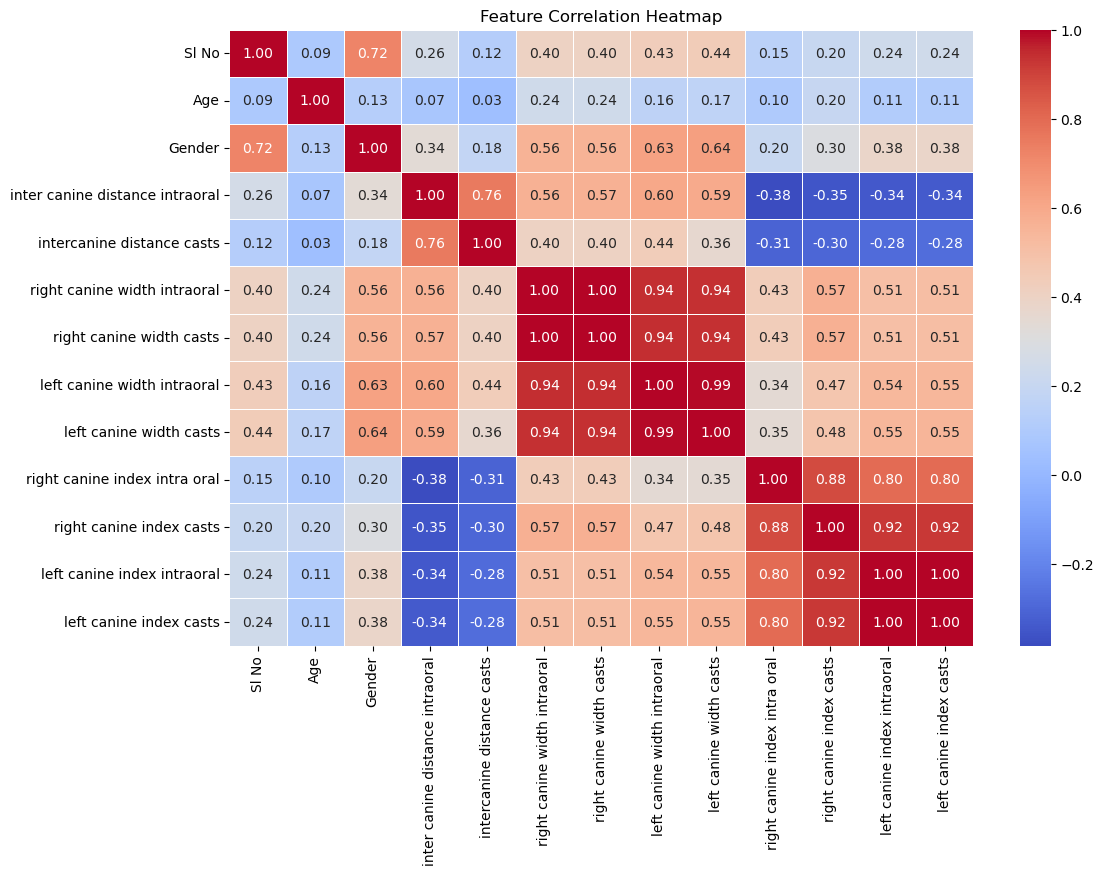

In [152]:
#step 5: EDA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed dataset


# Dropping irrelevant columns (modify as per the dataset)
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# Convert categorical data to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

# Splitting into independent (X) and dependent (y) variables
X = df.drop(columns=['Gender'])  # Replace 'Target_Column' with actual target column
y = df['Gender']

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [154]:
#step6: Model building
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset


# Dropping irrelevant columns (modify if needed)
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# Convert categorical features to numerical
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

# Define independent (X) and dependent (y) variables

y = df['Gender']  # Change 'Target_Column' to the actual target column name
X= df.drop(columns=['Gender'])

# Compute correlation matrix
correlation_matrix = X.corr()

# Identify highly correlated features (above 0.85 correlation)
threshold = 0.85
highly_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            col_name = correlation_matrix.columns[i]
            highly_corr_features.add(col_name)

# Drop highly correlated features
X.drop(columns=highly_corr_features, inplace=True)

# Splitting data into Train and Test sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}


# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Model: Logistic Regression
Accuracy: 0.9045
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       110
           1       0.92      0.89      0.90       110

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220

--------------------------------------------------
Model: Decision Tree
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       110

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220

--------------------------------------------------
Model: Random Forest
Accuracy: 0.9909
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       110
           1   

Model: Logistic Regression
Accuracy: 0.9136



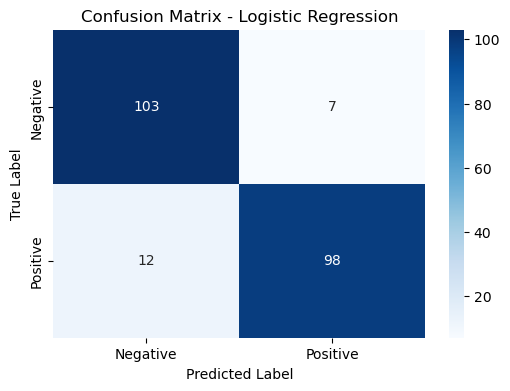

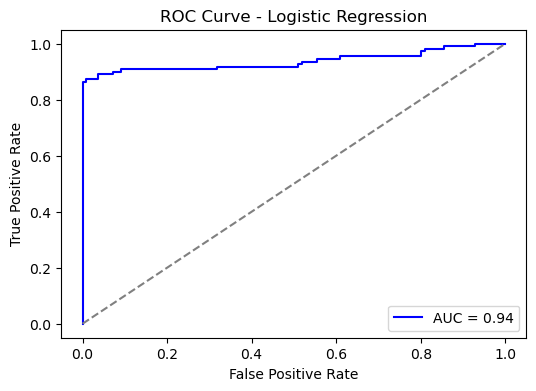

--------------------------------------------------
Model: Decision Tree
Accuracy: 1.0000



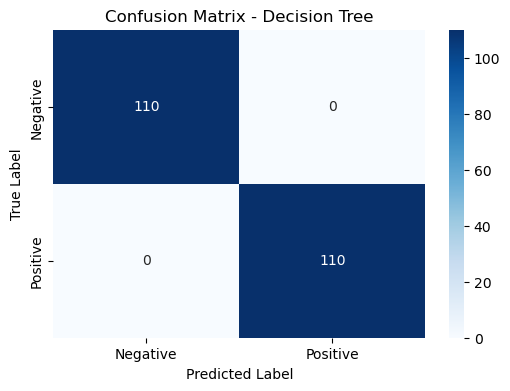

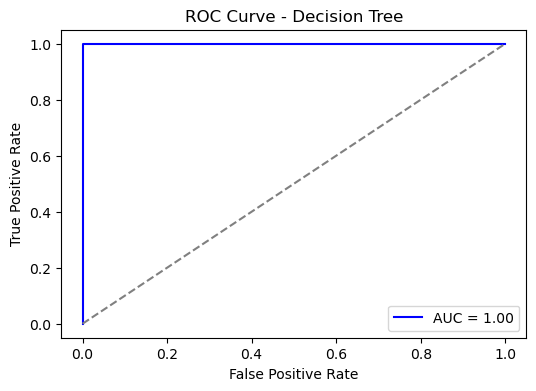

--------------------------------------------------
Model: Random Forest
Accuracy: 0.9864



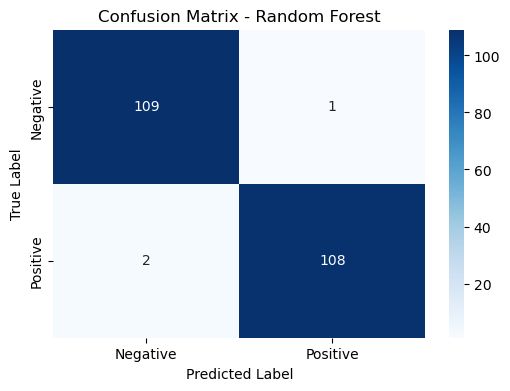

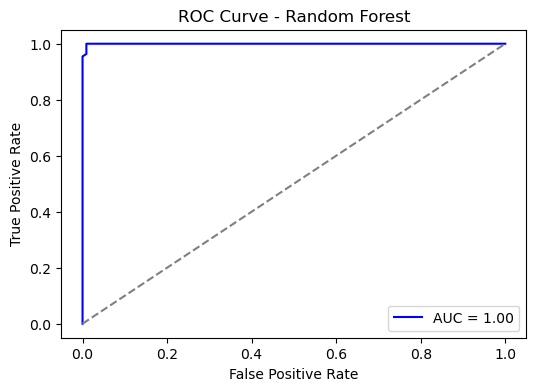

--------------------------------------------------
Model: XGBoost
Accuracy: 0.9955



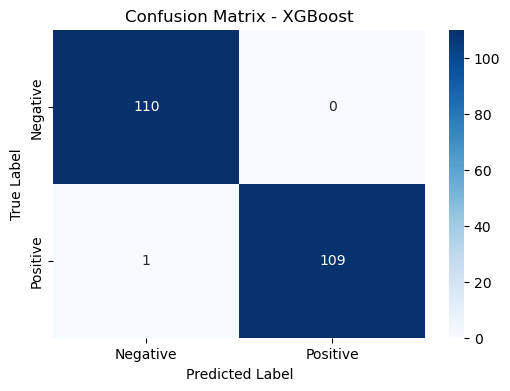

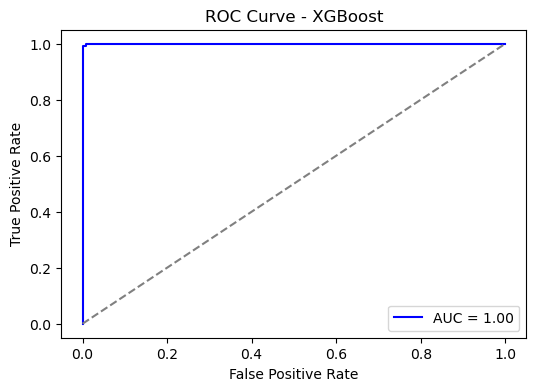

--------------------------------------------------


In [94]:
#step7: Model evaluation
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# Function to plot Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Function to plot ROC Curve
def plot_roc_curve(y_test, y_probs, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.show()

# Evaluate all models
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]  # Get probability scores

    # Print Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}\n")

    # Plot Confusion Matrix
    plot_confusion_matrix(y_test, y_pred, name)

    # Plot ROC Curve
    plot_roc_curve(y_test, y_probs, name)

    print("-" * 50)
